## Project Title: Perform Exploratory Data Analysis on Books Data using Python

>Project by: Khushi

>Dataset: Goodreads Book Data

>Goal: To explore how book features relate to popularity and ratings using Python (Pandas, Matplotlib, Seaborn).

## Objective

I'm a book lover myself, so i wanted to pick up a project that interest me so i took up GoodRead-Book data to analyze and visualize trends in books data to uncover insights about ratings, genres, authors, and publication patterns. For this i'm going to use Python libraries (Pandas, Matplotlib, Seaborn).

-Data cleaning and preprocessing

-Data visualization (Seaborn/Matplotlib/Plotly)

-Statistical exploration

-Correlation analysis and feature insight derivation

**This analysis aims to explore patterns in reader engagement, book ratings, and author/publisher performance.
The following key questions guide the exploration:**

>Which authors consistently perform well?
→ Identifying authors who maintain high ratings across multiple books.

>Which publication companies generally perform better?
→ Comparing publishers based on the number of books published and their overall reader ratings.

>Which books are talked about the most?
→ Determining books with the highest review counts to measure audience engagement.

>Do a high number of ratings lead to a high average rating?
→ Examining whether popularity influences perceived quality.

>Do longer books get better reviews?
→ Exploring if book length affects reader satisfaction.

>Which books are rated the highest (considering fair review counts)?
→ Highlighting top-rated books while filtering out statistically insignificant data.

## Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
 pip install openpyxl

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


## Loading And Exploring The Data

In [4]:
df = pd.read_csv('E:/EDA on Books/books.csv')
df.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,Unnamed: 12
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,439785960,9.78044E+12,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,NaN
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,439358078,9.78044E+12,eng,870,2153167,29221,09-01-2004,Scholastic Inc.,NaN
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,439554896,9.78044E+12,eng,352,6333,244,11-01-2003,Scholastic,NaN
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9.78044E+12,eng,435,2339585,36325,05-01-2004,Scholastic Inc.,NaN
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,439682584,9.78044E+12,eng,2690,41428,164,9/13/2004,Scholastic,NaN


In [5]:
df.tail()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,Unnamed: 12
11122,45631,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,1560254416,9.78156E+12,eng,512,156,20,12/21/2004,Da Capo Press,NaN
11123,45633,You Bright and Risen Angels,William T. Vollmann,4.08,140110879,9.78014E+12,eng,635,783,56,12-01-1988,Penguin Books,NaN
11124,45634,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,140131965,9.78014E+12,eng,415,820,95,08-01-1993,Penguin Books,NaN
11125,45639,Poor People,William T. Vollmann,3.72,60878827,9.78006E+12,eng,434,769,139,2/27/2007,Ecco,NaN
11126,45641,Las aventuras de Tom Sawyer,Mark Twain,3.91,8497646983,9.7885E+12,spa,272,113,12,5/28/2006,Edimat Libros,NaN


In [6]:
df.shape

(11127, 13)

In [7]:
df.columns

Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', '  num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher', 'Unnamed: 12'],
      dtype='object')

In [8]:
df.count()

bookID                11127
title                 11127
authors               11127
average_rating        11127
isbn                  11127
isbn13                11127
language_code         11127
  num_pages           11127
ratings_count         11127
text_reviews_count    11127
publication_date      11127
publisher             11127
Unnamed: 12               4
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11127 entries, 0 to 11126
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   bookID              11127 non-null  int64 
 1   title               11127 non-null  object
 2   authors             11127 non-null  object
 3   average_rating      11127 non-null  object
 4   isbn                11127 non-null  object
 5   isbn13              11127 non-null  object
 6   language_code       11127 non-null  object
 7     num_pages         11127 non-null  object
 8   ratings_count       11127 non-null  int64 
 9   text_reviews_count  11127 non-null  int64 
 10  publication_date    11127 non-null  object
 11  publisher           11127 non-null  object
 12  Unnamed: 12         4 non-null      object
dtypes: int64(3), object(10)
memory usage: 1.1+ MB


In [10]:
df.describe()

,bookID,ratings_count,text_reviews_count
count,11127.000000,1.112700e+04,11127.000000
mean,21310.938887,1.793649e+04,541.864474
std,13093.358023,1.124794e+05,2576.174610
min,1.000000,0.000000e+00,0.000000
25%,10287.000000,1.040000e+02,9.000000
50%,20287.000000,7.450000e+02,47.000000
75%,32104.500000,4.993500e+03,237.500000
max,45641.000000,4.597666e+06,94265.000000


In [11]:
print(df['title'].nunique())
print(df['title'].unique())

10352
['Harry Potter and the Half-Blood Prince (Harry Potter  #6)'
 'Harry Potter and the Order of the Phoenix (Harry Potter  #5)'
 'Harry Potter and the Chamber of Secrets (Harry Potter  #2)' ...
 'The Ice-Shirt (Seven Dreams #1)' 'Poor People'
 'Las aventuras de Tom Sawyer']


In [12]:
df['title'].value_counts().head()

title
The Iliad                 9
The Brothers Karamazov    9
The Odyssey               8
Gulliver's Travels        8
Anna Karenina             8
Name: count, dtype: int64

In [13]:
df['authors'].value_counts().head()

authors
Stephen King        40
P.G. Wodehouse      40
Rumiko Takahashi    39
Orson Scott Card    35
Agatha Christie     33
Name: count, dtype: int64

In [14]:
df['publisher'].value_counts().head()

publisher
Vintage             318
Penguin Books       261
Penguin Classics    184
Mariner Books       150
Ballantine Books    144
Name: count, dtype: int64

In [15]:
df.memory_usage()

Index                   132
bookID                89016
title                 89016
authors               89016
average_rating        89016
isbn                  89016
isbn13                89016
language_code         89016
  num_pages           89016
ratings_count         89016
text_reviews_count    89016
publication_date      89016
publisher             89016
Unnamed: 12           89016
dtype: int64

In [16]:
df.dtypes

bookID                 int64
title                 object
authors               object
average_rating        object
isbn                  object
isbn13                object
language_code         object
  num_pages           object
ratings_count          int64
text_reviews_count     int64
publication_date      object
publisher             object
Unnamed: 12           object
dtype: object

## Cleaning The Data

In [17]:
duplicates = df[df.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [bookID, title, authors, average_rating, isbn, isbn13, language_code,   num_pages, ratings_count, text_reviews_count, publication_date, publisher, Unnamed: 12]
Index: []


In [18]:
null_values = df[df.isnull()]
print(null_values)

       bookID title authors average_rating isbn isbn13 language_code  \
0         NaN   NaN     NaN            NaN  NaN    NaN           NaN   
1         NaN   NaN     NaN            NaN  NaN    NaN           NaN   
2         NaN   NaN     NaN            NaN  NaN    NaN           NaN   
3         NaN   NaN     NaN            NaN  NaN    NaN           NaN   
4         NaN   NaN     NaN            NaN  NaN    NaN           NaN   
...       ...   ...     ...            ...  ...    ...           ...   
11122     NaN   NaN     NaN            NaN  NaN    NaN           NaN   
11123     NaN   NaN     NaN            NaN  NaN    NaN           NaN   
11124     NaN   NaN     NaN            NaN  NaN    NaN           NaN   
11125     NaN   NaN     NaN            NaN  NaN    NaN           NaN   
11126     NaN   NaN     NaN            NaN  NaN    NaN           NaN   

        num_pages  ratings_count  text_reviews_count publication_date  \
0             NaN            NaN                 NaN          

In [19]:
df.isnull().sum()

bookID                    0
title                     0
authors                   0
average_rating            0
isbn                      0
isbn13                    0
language_code             0
  num_pages               0
ratings_count             0
text_reviews_count        0
publication_date          0
publisher                 0
Unnamed: 12           11123
dtype: int64

In [20]:
df.dropna()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,Unnamed: 12
3348,12224,Streetcar Suburbs: The Process of Growth in Bo...,Sam Bass Warner,Jr./Sam B. Warner,3.58,674842111,9.78067E+12,en-US,236,61,6,4/20/2004,Harvard University Press
4702,16914,The Tolkien Fan's Medieval Reader,David E. Smith (Turgon of TheOneRing.net,one of the founding members of this Tolkien w...,3.58,1593600119,9.78159E+12,eng,400,26,4,04-06-2004,Cold Spring Press
5877,22128,Patriots (The Coming Collapse),James Wesley,Rawles,3.63,156384155X,9.78156E+12,eng,342,38,4,1/15/1999,Huntington House Publishers
8979,34889,Brown's Star Atlas: Showing All The Bright Sta...,Brown,Son & Ferguson,0,851742718,9.78085E+12,eng,49,0,0,05-01-1977,Brown Son & Ferguson Ltd.


In [21]:
df.notnull().sum()

bookID                11127
title                 11127
authors               11127
average_rating        11127
isbn                  11127
isbn13                11127
language_code         11127
  num_pages           11127
ratings_count         11127
text_reviews_count    11127
publication_date      11127
publisher             11127
Unnamed: 12               4
dtype: int64

In [22]:
df.drop(['isbn','isbn13','Unnamed: 12'],axis=1)

,bookID,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,eng,870,2153167,29221,09-01-2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,eng,352,6333,244,11-01-2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,eng,435,2339585,36325,05-01-2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,eng,2690,41428,164,9/13/2004,Scholastic
...,...,...,...,...,...,...,...,...,...,...
11122,45631,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,eng,512,156,20,12/21/2004,Da Capo Press
11123,45633,You Bright and Risen Angels,William T. Vollmann,4.08,eng,635,783,56,12-01-1988,Penguin Books
11124,45634,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,eng,415,820,95,08-01-1993,Penguin Books
11125,45639,Poor People,William T. Vollmann,3.72,eng,434,769,139,2/27/2007,Ecco


## Removing Outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x1c5fecca570>,
 'caps': [<matplotlib.lines.Line2D at 0x1c5feccab70>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c5fe97e9c0>],
 'medians': [<matplotlib.lines.Line2D at 0x1c5feccb1d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c5feccb4a0>],
 'means': []}

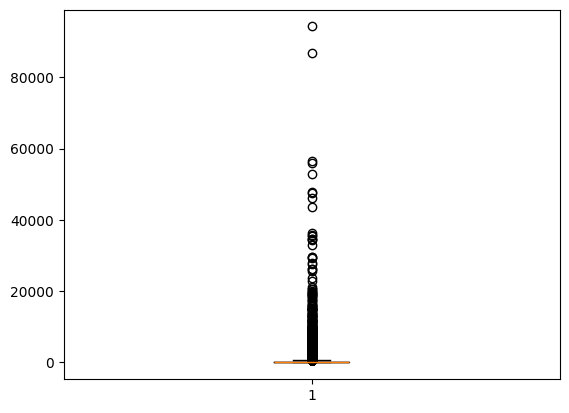

In [23]:
plt.boxplot(x=df['text_reviews_count'])

In [24]:
Q1 = df['text_reviews_count'].quantile(0.25)
Q3 = df['text_reviews_count'].quantile(0.75)
print(f'Q1: {Q1}, Q3: {Q3}')
IQR = Q3 - Q1
print(IQR)

Q1: 9.0, Q3: 237.5
228.5


In [25]:
lower_bound = Q1 - 1.5* IQR
upper_bound = Q3 + 1.5* IQR
print(lower_bound)
print(upper_bound)

-333.75
580.25


{'whiskers': [<matplotlib.lines.Line2D at 0x1c5fed71190>,
 'caps': [<matplotlib.lines.Line2D at 0x1c5fed71790>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c5fed70f50>],
 'medians': [<matplotlib.lines.Line2D at 0x1c5fed71d30>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c5fed72000>],
 'means': []}

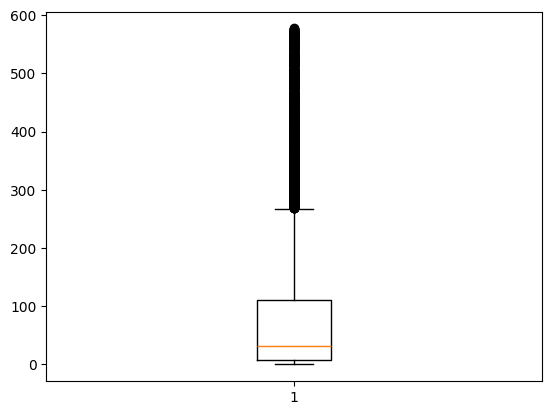

In [26]:
filtered_text_review = df[(df['text_reviews_count'] >= lower_bound) & (df['text_reviews_count'] <= upper_bound)]
plt.boxplot(x=filtered_text_review['text_reviews_count'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1c5feddd1f0>,
 'caps': [<matplotlib.lines.Line2D at 0x1c5feddd7c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c5feddcf80>],
 'medians': [<matplotlib.lines.Line2D at 0x1c5fedddcd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c5fedddfa0>],
 'means': []}

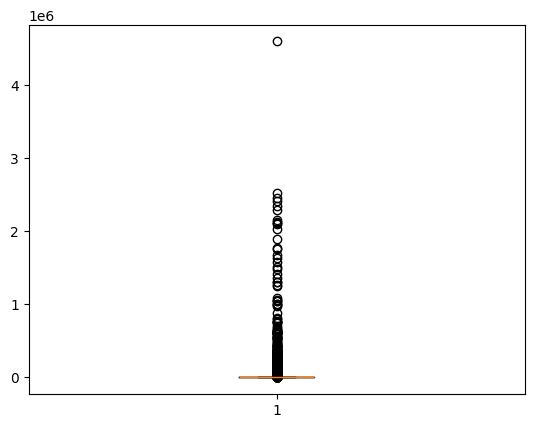

In [27]:
plt.boxplot(x=df['ratings_count'])

In [28]:
Q1 = df['ratings_count'].quantile(0.25)
Q3 = df['ratings_count'].quantile(0.75)
print(f'Q1: {Q1}, Q3: {Q3}')
IQR = Q3 - Q1
print(IQR)

Q1: 104.0, Q3: 4993.5
4889.5


In [29]:
lower_bound = Q1 - 1.5* IQR
upper_bound = Q3 + 1.5* IQR
print(lower_bound)
print(upper_bound)

-7230.25
12327.75


{'whiskers': [<matplotlib.lines.Line2D at 0x1c5fee1a0c0>,
 'caps': [<matplotlib.lines.Line2D at 0x1c5fee1a690>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c5fee19e50>],
 'medians': [<matplotlib.lines.Line2D at 0x1c5fee1ab10>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c5fee1ae40>],
 'means': []}

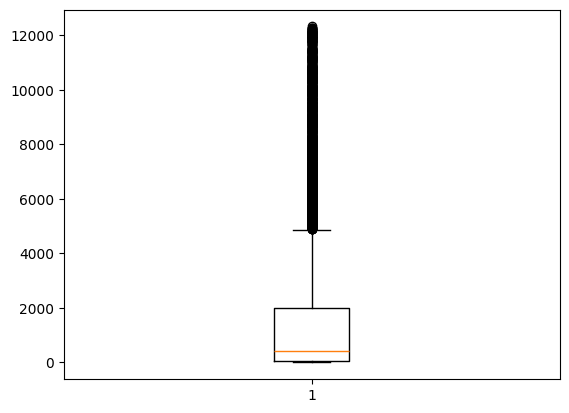

In [30]:
filtered_review_count = df[(df['ratings_count'] >= lower_bound) & (df['ratings_count'] <= upper_bound)]
plt.boxplot(x=filtered_review_count['ratings_count'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1c5fee90890>,
 'caps': [<matplotlib.lines.Line2D at 0x1c5fee90da0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c5fee90680>],
 'medians': [<matplotlib.lines.Line2D at 0x1c5fee913a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c5fee91670>],
 'means': []}

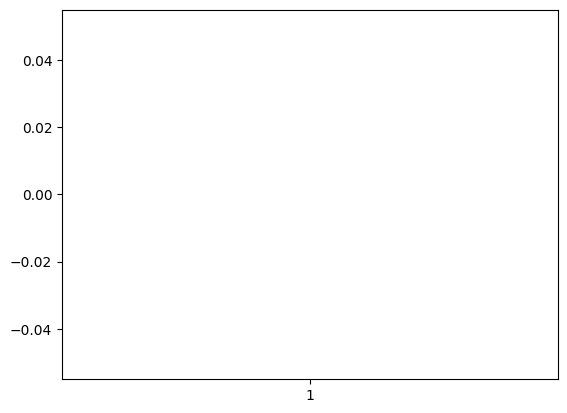

In [31]:
df['average_rating']=pd.to_numeric(df['average_rating'], errors='coerce').astype(float)

plt.boxplot(x=df['average_rating'])

In [32]:
Q1 = df['average_rating'].quantile(0.25)
Q3 = df['average_rating'].quantile(0.75)
print(f'Q1: {Q1}, Q3: {Q3}')
IQR = Q3 - Q1
print(IQR)

Q1: 3.77, Q3: 4.14
0.36999999999999966


In [33]:
lower_bound = Q1 - 1.5* IQR
upper_bound = Q3 + 1.5* IQR
print(lower_bound)
print(upper_bound)

3.2150000000000007
4.694999999999999


{'whiskers': [<matplotlib.lines.Line2D at 0x1c582142690>,
 'caps': [<matplotlib.lines.Line2D at 0x1c582142cc0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c5feeaed50>],
 'medians': [<matplotlib.lines.Line2D at 0x1c582143290>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c582143590>],
 'means': []}

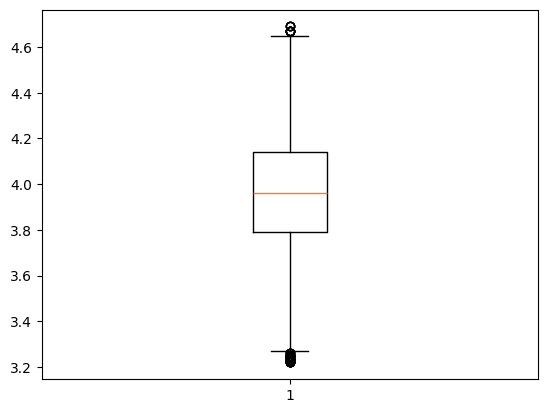

In [34]:
filtered_rating = df[(df['average_rating'] >= lower_bound) & (df['average_rating'] <= upper_bound)]
plt.boxplot(x=filtered_rating['average_rating'])

I tried to remove more outliner from this graph especially to see the clear view of average rating. 

In [35]:
Q1 = filtered_rating['average_rating'].quantile(0.25)
Q3 = filtered_rating['average_rating'].quantile(0.75)
print(f'Q1: {Q1}, Q3: {Q3}')
IQR = Q3 - Q1
print(IQR)

Q1: 3.79, Q3: 4.14
0.34999999999999964


In [36]:
lower_bound = Q1 - 1.5* IQR
upper_bound = Q3 + 1.5* IQR
print(lower_bound)
print(upper_bound)

3.2650000000000006
4.664999999999999


{'whiskers': [<matplotlib.lines.Line2D at 0x1c5821b6cf0>,
 'caps': [<matplotlib.lines.Line2D at 0x1c5821b7290>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c5821b69c0>],
 'medians': [<matplotlib.lines.Line2D at 0x1c5821b7800>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c5821b7aa0>],
 'means': []}

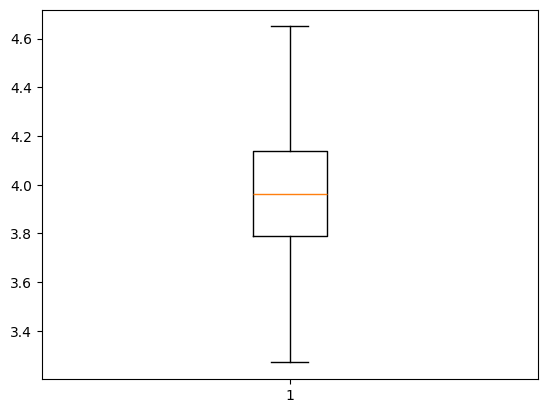

In [37]:
final_rating = filtered_rating[( filtered_rating['average_rating'] >= lower_bound) & (filtered_rating['average_rating'] <= upper_bound)]
plt.boxplot(x=final_rating['average_rating'])

## Which books are talked about the most? 

In [121]:
most_talked_books = df.groupby('title')['text_reviews_count'].sum()
most_talked_books = most_talked_books.sort_values(ascending=False).head(10)
most_talked_books

title
The Book Thief                                               86881
The Giver (The Giver  #1)                                    56604
The Glass Castle                                             46176
The Catcher in the Rye                                       43499
The Curious Incident of the Dog in the Night-Time            37143
The Da Vinci Code (Robert Langdon  #2)                       36634
Outlander (Outlander  #1)                                    34690
The Road                                                     34301
The Hobbit  or There and Back Again                          32871
Harry Potter and the Half-Blood Prince (Harry Potter  #6)    27669
Name: text_reviews_count, dtype: int64

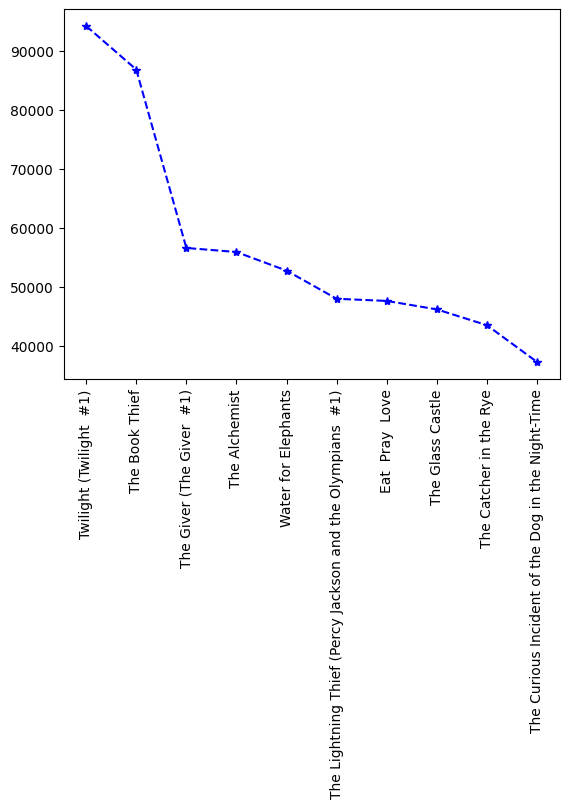

In [120]:
plt.plot(most_talked_books, marker = '*', color='blue', linestyle='--')
plt.xticks(rotation=90)
plt.show()

The analysis shows that **Twilight** and **The Book Thief** are the most talked-about books, each receiving over *85,000 text reviews*. This indicates a high level of reader engagement and lasting audience interest. Books like *The Alchemist and The Giver also show steady engagement*, reflecting consistent popularity rather than short-term hype.

The top 10 most-discussed books largely belong to *emotional or imaginative storytelling genres such as Fantasy, Adventure, and Inspirational Fiction*. This suggests that readers are most engaged with stories that offer emotional depth, personal growth, or escapism.

In [40]:
author = df.groupby('authors')['ratings_count'].sum()
author = author.sort_values(ascending=False)
print(author.head(10))

authors
J.K. Rowling/Mary GrandPré                 8923980
J.R.R. Tolkien                             4776638
Stephenie Meyer                            4597666
Dan Brown                                  4135380
Nicholas Sparks                            3048149
Stephen King                               2985634
J.D. Salinger                              2777908
Rick Riordan                               2413447
George Orwell/Boris Grabnar/Peter Škerl    2111750
John Steinbeck                             2091579
Name: ratings_count, dtype: int64


In [41]:
author = df.groupby('authors')['average_rating'].sum()
author = author.sort_values(ascending=False)
print(author.head(10))

authors
P.G. Wodehouse      165.89
Rumiko Takahashi    163.28
Stephen King        158.94
Orson Scott Card    132.27
Agatha Christie     131.64
Mercedes Lackey     117.14
Piers Anthony       111.50
Dick Francis        110.94
Sandra Brown        108.52
Terry Pratchett      94.60
Name: average_rating, dtype: float64


In [42]:
author = df.groupby('authors')['text_reviews_count'].sum()
author = author.sort_values(ascending=False)
print(author.head(10))

authors
J.K. Rowling/Mary GrandPré           128006
Stephenie Meyer                       94265
Markus Zusak/Cao Xuân Việt Khương     86881
Jodi Picoult                          79300
Lois Lowry                            74197
Rick Riordan                          69769
Diana Gabaldon                        66428
Dan Brown                             60875
Nicholas Sparks                       60426
Stephen King                          55897
Name: text_reviews_count, dtype: int64


In [43]:

author = df.groupby('title')['average_rating'].sum()
author = author.sort_values(ascending=False)
print(author.head(20))

title
The Brothers Karamazov                                38.88
The Iliad                                             34.74
Anna Karenina                                         32.40
'Salem's Lot                                          32.39
The Odyssey                                           30.08
Gulliver's Travels                                    28.74
The Picture of Dorian Gray                            28.56
A Midsummer Night's Dream                             27.58
Collected Stories                                     25.52
The Secret Garden                                     24.98
Jane Eyre                                             24.66
Sense and Sensibility                                 24.42
The Histories                                         23.94
The Great Gatsby                                      23.43
Macbeth                                               23.40
Treasure Island                                       22.98
The Return of the King (The Lord o

## Do longer books get better reviews? 


In [110]:
df.columns =df.columns.str.strip()
df['num_pages'] =pd.to_numeric(df['num_pages'],errors='coerce').astype('Int64')
longer_books = df.groupby('num_pages')['average_rating'].mean()
longer_books = longer_books.sort_values(ascending=False)
print(longer_books.head(20))

num_pages
2690    4.780
6576    4.700
712     4.700
1878    4.640
1728    4.590
652     4.570
888     4.570
1184    4.565
1278    4.550
1256    4.540
1216    4.530
1122    4.500
34      4.500
907     4.500
1296    4.490
548     4.470
1059    4.470
1313    4.460
43      4.460
158     4.455
Name: average_rating, dtype: float64


Text(0.5, 1.0, 'Relation between Number of pages and Average rating')

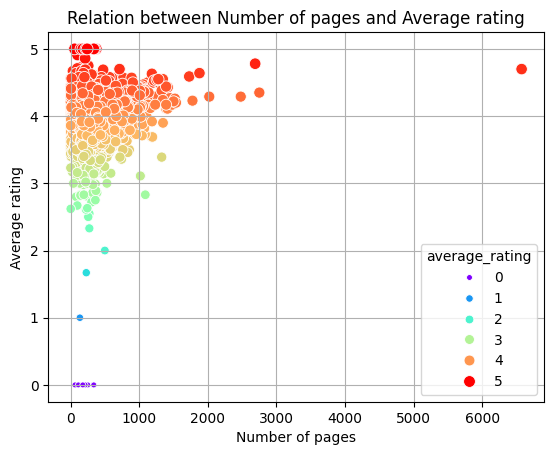

In [118]:
sns.scatterplot(x=df['num_pages'], y=df['average_rating'], size= df['average_rating'], hue=df['average_rating'], palette='rainbow')
plt.grid()
plt.xlabel('Number of pages')
plt.ylabel('Average rating')
plt.title('Relation between Number of pages and Average rating')

The analysis shows that there is no strong direct relationship between the number of pages in a book and its average rating. While some longer books receive high ratings (above 4.5), there are also many shorter books with equally strong reader appreciation.

Most books, regardless of length, tend to cluster around an **average rating between 4.0 and 4.5**, indicating that story quality and reader engagement matter more than book length. However, a *few extremely lengthy books (over 2000 pages) do achieve higher ratings*, possibly due to being part of a well-developed series or detailed literary works. *Some of the very short books get very low reviews.*

Overall, this suggests that longer books do not necessarily perform better, but when they do receive good ratings, it may reflect the author’s ability to maintain reader interest throughout the extended narrative.

## Do a high number of ratings get a high average rating? 

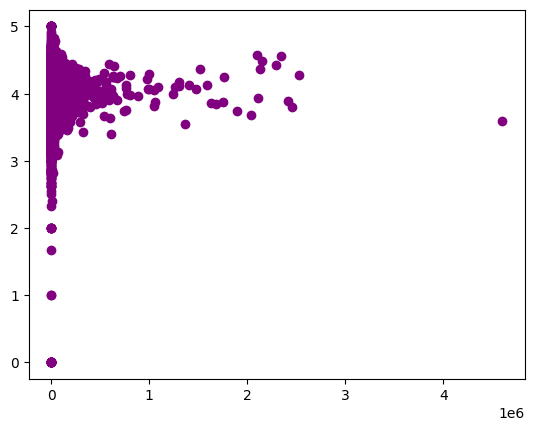

In [46]:
plt.scatter(df['ratings_count'], df['average_rating'], color='purple')
plt.show()

The analysis shows that there is no strong correlation between how many ratings a book receives and its average rating. In other words, popularity does not necessarily mean higher quality.

However, a clear pattern can be observed -
Books with **very few ratings often have extreme average scores (either very high or very low), while books with large numbers of ratings tend to have more stable averages around 4.0-4.5**.

This suggests that as more readers review a book, the average rating becomes more balanced and representative of overall public opinion. Therefore, while highly rated books can also be popular, popular books are not always the highest rated.

## which books are rated higher? (keeping rating count in mind)

In [106]:
filtered_rating = df[df['ratings_count']>1000]
highest_rating = (
    filtered_rating.groupby('title')
    .agg({'average_rating' : 'mean', 'ratings_count' : 'sum'})
    .sort_values(by='average_rating', ascending=False)
)
highest_rating = highest_rating.reset_index()
highest_rating= highest_rating.head(20)
highest_rating

,title,average_rating,ratings_count
0,Harry Potter Boxed Set Books 1-5 (Harry Potte...,4.78,41428
1,Calvin and Hobbes: Sunday Pages 1985-1995: An ...,4.71,3613
2,The Complete Aubrey/Maturin Novels (5 Volumes),4.70,1338
3,The New Annotated Sherlock Holmes: The Complet...,4.64,1411
4,The Shawshank Redemption: The Shooting Script,4.64,2406
5,Nausicaä of the Valley of the Wind Vol. 5 (Na...,4.61,1904
6,Fullmetal Alchemist Vol. 10,4.60,8989
7,Fullmetal Alchemist Vol. 12 (Fullmetal Alchem...,4.60,7480
8,Fullmetal Alchemist Vol. 11 (Fullmetal Alchem...,4.59,7655
9,J.R.R. Tolkien 4-Book Boxed Set: The Hobbit an...,4.59,101233


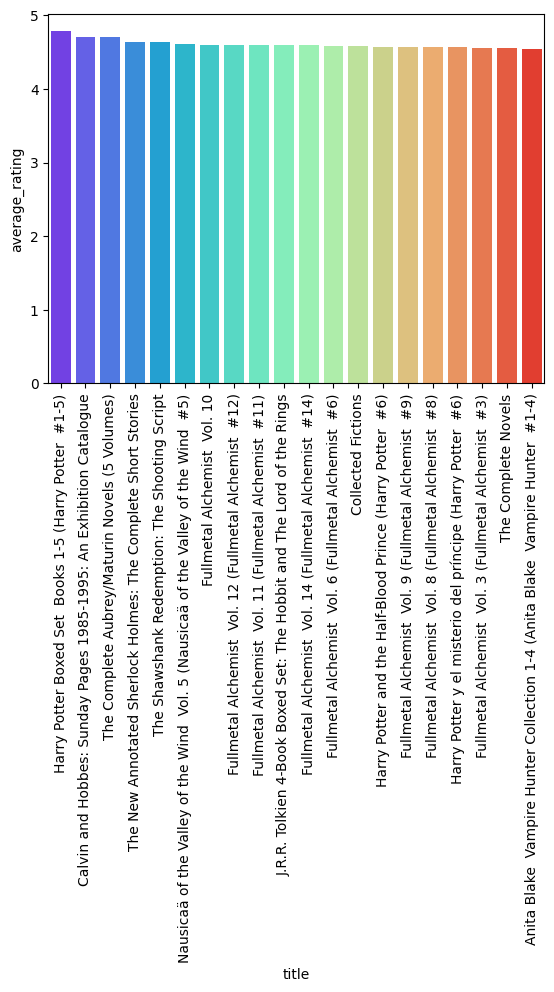

In [107]:
sns.barplot(x=highest_rating['title'], y=highest_rating['average_rating'], hue=highest_rating['title'], palette='rainbow')
plt.xticks(rotation = 90)
plt.show()

After filtering books that received more than 1,000 ratings to ensure fairness, the analysis shows that popular and well-loved series like *Harry Potter, Calvin and Hobbes, and Fullmetal Alchemist consistently* rank among the highest-rated books.

The *Harry Potter Boxed Set* stands out with an impressive average rating of **4.78 and over 40,000 reviews**, reflecting strong reader satisfaction and broad engagement. Similarly, Calvin and Hobbes and The Complete Aubrey/Maturin Novels also maintain high ratings above 4.6, indicating that readers value both storytelling and creativity in these works.

Overall, the results suggest that books with higher reader participation tend to have slightly more reliable and consistent ratings. It also shows that *well-established franchises or series often maintain strong audience trust and long-term appeal*.

## By which publication company's books generally perform better? 

In [49]:
pub_count = df.groupby('publisher')['bookID'].count()
pub_count = pub_count.sort_values(ascending=False)

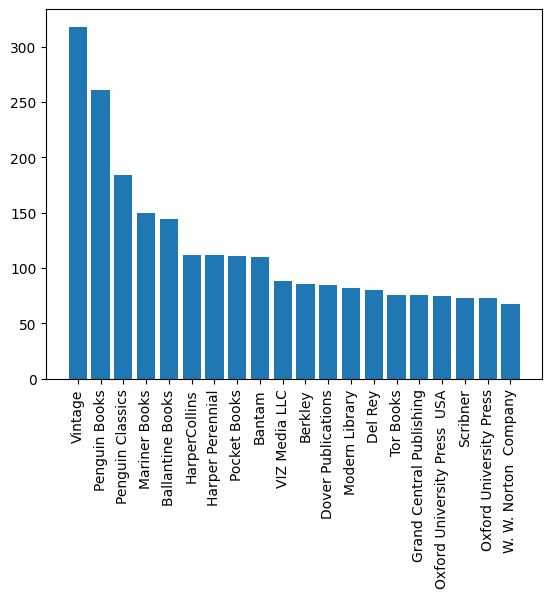

In [50]:
pub_count = pub_count.reset_index()
top_20_pub = pub_count.head(20)
plt.bar(top_20_pub['publisher'], top_20_pub['bookID'])
plt.xticks(rotation=90)
plt.show()

In [51]:
pub_rating = filtered_rating.groupby('publisher')['average_rating'].sum()
pub_rating = pub_rating.sort_values(ascending=False)

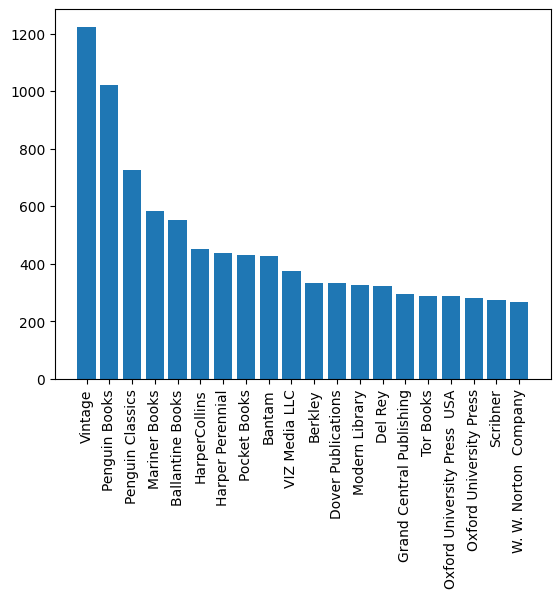

In [52]:
pub_rating = pub_rating.reset_index()
top_20_pub_ranking = pub_rating.head(20)
plt.bar(top_20_pub_ranking['publisher'], top_20_pub_ranking['average_rating'])
plt.xticks(rotation=90)
plt.show()

In [53]:
Top_publications = (
    filtered_rating.groupby('publisher')
    .agg({'bookID' : 'count' , 'average_rating' : 'mean'})
)

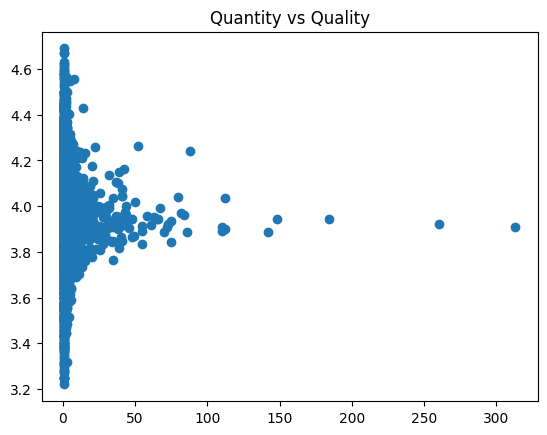

In [54]:
plt.scatter(data = Top_publications, x = 'bookID', y='average_rating')
plt.title('Quantity vs Quality')
plt.show()

The analysis of publishers reveals that **Vintage** and **Penguin Books** lead in terms of the number of books published, as well as the overall performance of their titles. These publishers not only produce *a large number of books* but also maintain consistently *high average ratings of around 4.2–4.3*, indicating a strong editorial standard and stable reader satisfaction.

Most publishers fall in the **low to medium publication range (10–100 books) and maintain average ratings near 4.0–4.3**, suggesting that book quality remains steady regardless of publication volume.

Smaller publishers display more variability in ratings, with some achieving exceptionally high averages due to niche specialization or focused target audiences.

Overall, the findings suggest that large publishers like Vintage and Penguin Books successfully balance both productivity and quality, while smaller or specialized publishers tend to focus on quality within specific genres or audiences.

## Which authors consistently perform well? 

In [99]:
author_stats = (
    df.groupby('authors')['average_rating']
    .agg(['mean', 'std', 'count'])
    .rename(columns={'mean': 'avg_rating', 'std': 'rating_variability', 'count': 'books_published'})
)
author_stats= author_stats.sort_values(by='books_published',ascending=False).head(10)
author_stats

,avg_rating,rating_variability,books_published
authors,,,
Orson Scott Card,3.824545,0.269845,22
P.G. Wodehouse,4.165000,0.155106,20
Piers Anthony,3.753529,0.147222,17
Rumiko Takahashi,4.231176,0.098354,17
Janet Evanovich,3.967333,0.266846,15
Dean Koontz,3.940000,0.173349,13
Sandra Brown,3.646154,0.222768,13
John Grisham,3.843333,0.124851,12
Bill Bryson,3.953636,0.113602,11


<Axes: xlabel='books_published', ylabel='avg_rating'>

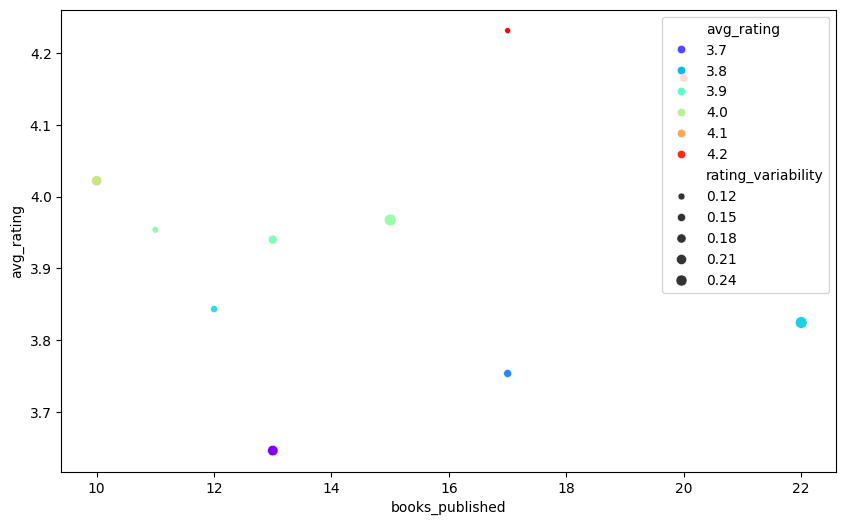

In [119]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=author_stats, x='books_published', y='avg_rating', size='rating_variability', hue='avg_rating', palette='rainbow',)

The analysis reveals that authors such as Orson Scott Card, P.G. Wodehouse, Piers Anthony, Rumiko Takahashi, and Janet Evanovich have *published a large number of books (10 or more)* while maintaining a strong *average rating between 3.5 and 4.5*. This indicates that these authors have been able to sustain a consistent level of quality across multiple works.

Even with a higher publication volume, their *low rating variability (below 0.3)* suggests that readers’ opinions about their books remain fairly stable. In other words, these authors manage to *balance both productivity and reader satisfaction*, which reflects a steady writing performance over time.

Overall, this shows that publishing more books does not necessarily reduce quality if an author maintains consistency in storytelling and reader engagement.


## Key Findings


**1. Book Popularity and Reader Engagement**

Twilight and The Book Thief are among the most discussed books, each having over 85,000 text reviews.
Highly talked-about books often belong to genres such as Fantasy, Young Adult Fiction, and Emotional/Reflective Narratives.
Readers engage more with emotionally impactful or immersive stories, suggesting that books with relatable emotional depth or imaginative worlds gain stronger organic visibility.

**2. Book Ratings vs Rating Count**

There is no strong correlation between how many ratings a book has and its average rating.
Books with fewer reviews tend to show more extreme average ratings (either very high or very low).
As the number of ratings increases, average ratings stabilize around 4.0–4.5, showing that large audiences create more balanced and reliable ratings.

**2. Books Rated the Highest (Considering Fair Review Counts)**

After filtering out books with fewer than 1,000 reviews, Harry Potter, Calvin and Hobbes, and The Complete Aubrey/Maturin Novels rank among the highest-rated books.
These titles represent both popular and high-quality works, maintaining ratings above 4.6 with a significant number of reader votes.
This indicates that mainstream, well-loved series can maintain strong quality and reader trust over time.

**4. Book Length and Ratings**

There is no direct relationship between the number of pages and the book’s rating.
Both short and long books can achieve high reader satisfaction.
However, extremely lengthy books (2000+ pages) that still receive strong ratings may reflect author credibility and depth in storytelling.
In general, story quality matters more than book length in determining reader satisfaction.

5. Publisher Performance**

Vintage and Penguin Books emerge as top publishers, excelling in both volume of publications and average book ratings (~4.2–4.3).
These publishers demonstrate consistent quality and editorial reliability, showing strong brand trust among readers.
Smaller publishers show more variability — some achieving higher averages due to genre specialization or niche audiences.

6. Author Consistency**

Authors such as Orson Scott Card, P.G. Wodehouse, and Rumiko Takahashi have published 10+ books while maintaining average ratings between 3.8 and 4.4.
Their low rating variability (below 0.3) shows steady performance across multiple releases, proving they can sustain reader satisfaction over time.
This reflects a balance between productivity and quality, which is rare and valuable in publishing.

7. Genre-Level Insight**

The most engaging and highly rated books cluster around Fantasy, Adventure, and Inspirational genres.
Readers show a clear preference for narrative depth, emotional transformation, and escapism, making these genres strong drivers of popularity and long-term engagement.